<a href="https://colab.research.google.com/github/Mnsk44/image-recommendations/blob/master/ImageAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Get the python code from dropbox
#wget https://www.dropbox.com/s/0carh89lg7fh9iu/classify_image.py
!ls
!wget https://c1.staticflickr.com/5/4129/5215831864_46f356962f_o.jpg
!mv 5215831864_46f356962f_o.jpg kuva.jpg
!ls
#!python classify_image.py --image_file https://c1.staticflickr.com/5/4129/5215831864_46f356962f_o.jpg



kuva.jpg  sample_data
--2018-11-10 07:49:55--  https://c1.staticflickr.com/5/4129/5215831864_46f356962f_o.jpg
Resolving c1.staticflickr.com (c1.staticflickr.com)... 69.147.82.61, 69.147.92.11, 69.147.92.12, ...
Connecting to c1.staticflickr.com (c1.staticflickr.com)|69.147.82.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211079 (206K) [image/jpeg]
Saving to: ‘5215831864_46f356962f_o.jpg’

5215831864_46f35696 100%[===================>] 206.13K  --.-KB/s    in 0.05s   

2018-11-10 07:49:55 (3.70 MB/s) - ‘5215831864_46f356962f_o.jpg’ saved [211079/211079]

kuva.jpg  sample_data


In [6]:
#!pip install pillow
import PIL.Image
img = PIL.Image.open('kuva.jpg')
exif_data = img._getexif()

import PIL.ExifTags
exif = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img._getexif().items()
    if k in PIL.ExifTags.TAGS
}

for k in exif:
  print(k, ":", exif[k])
  
  
  



GPSInfo : {0: b'\x02\x02\x00\x00'}
ResolutionUnit : 2
ExifOffset : 240
Make : Canon
Model : Canon EOS 40D
Software : Adobe Photoshop Elements 6.0 Windows
Orientation : 1
DateTime : 2010:11:28 14:16:16
YCbCrPositioning : 2
XResolution : (720000, 10000)
YResolution : (720000, 10000)
ExifVersion : b'0221'
ComponentsConfiguration : b'\x01\x02\x03\x00'
ShutterSpeedValue : (393216, 65536)
DateTimeOriginal : 2010:11:28 13:42:14
DateTimeDigitized : 2010:11:28 13:42:14
ApertureValue : (303104, 65536)
ExposureBiasValue : (0, 1)
MeteringMode : 5
UserComment : b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

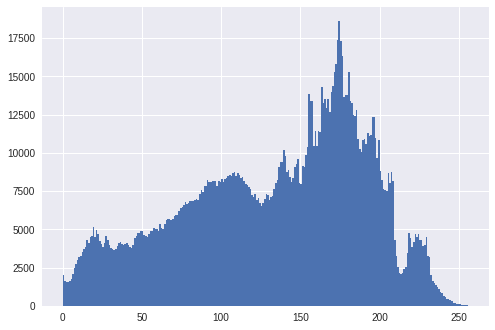

In [7]:

#https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('kuva.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()


In [0]:
#img = cv2.imread('kuva.jpg',0)
#color = ('b','g','r')
#for i,col in enumerate(color):
#  histr = cv2.calcHist([img],[i],None,[256],[0,256])
#  plt.plot(histr,color = col)
#  plt.xlim([0,256])
#plt.show()

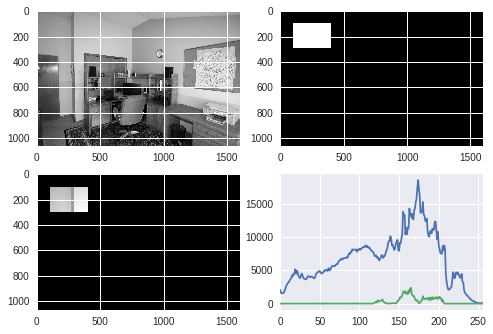

In [9]:
img = cv2.imread('kuva.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()